In [ ]:
# !pip install networkx 
# !pip install matplotlib

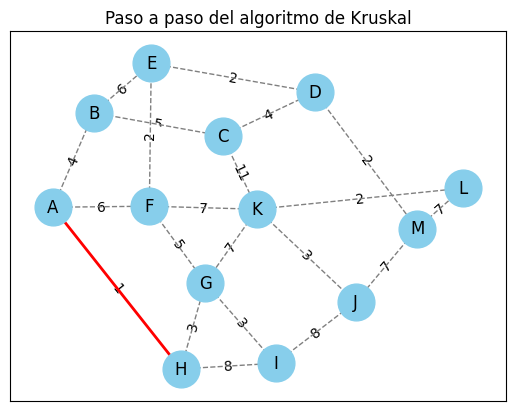

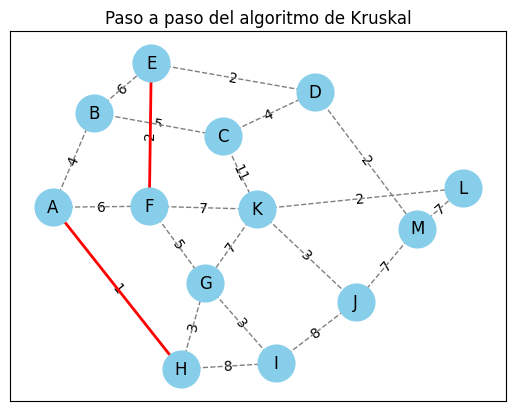

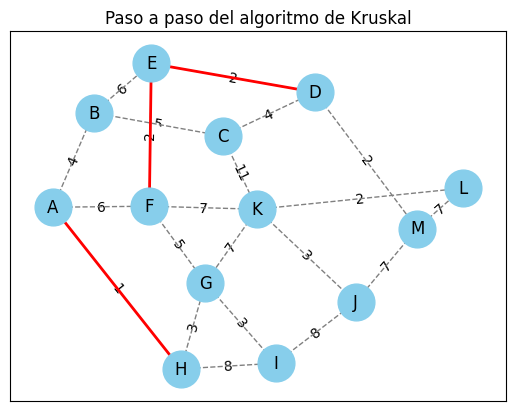

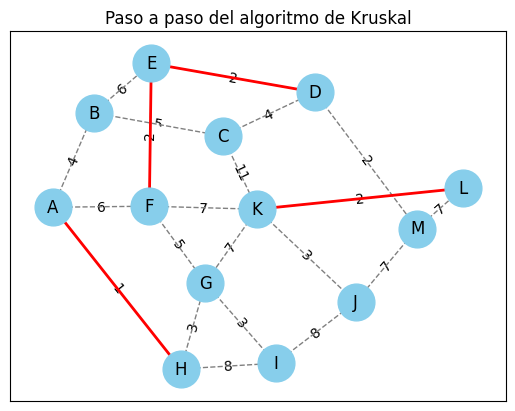

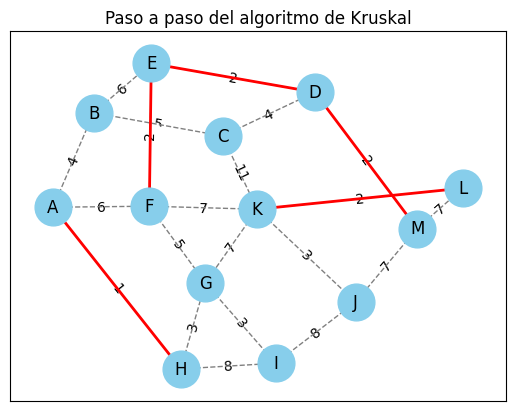

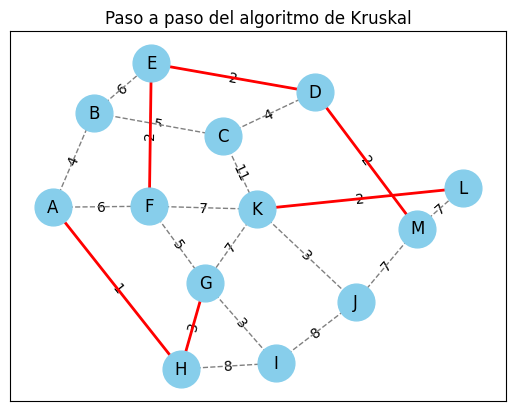

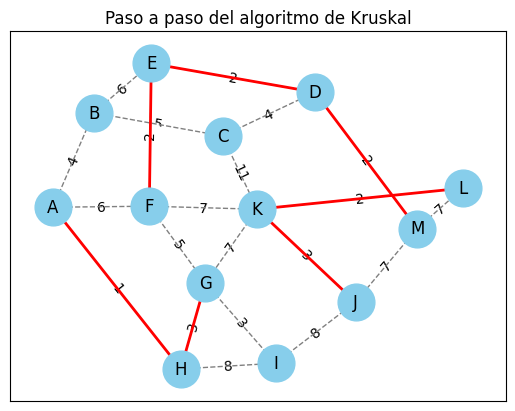

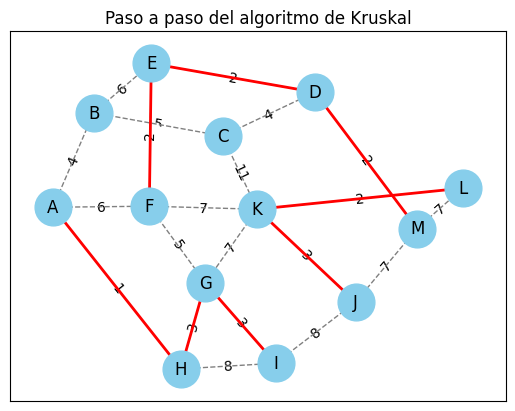

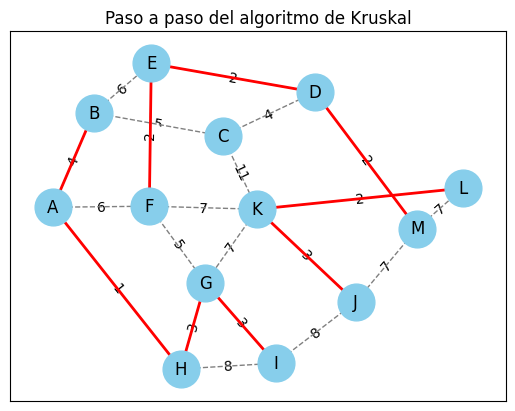

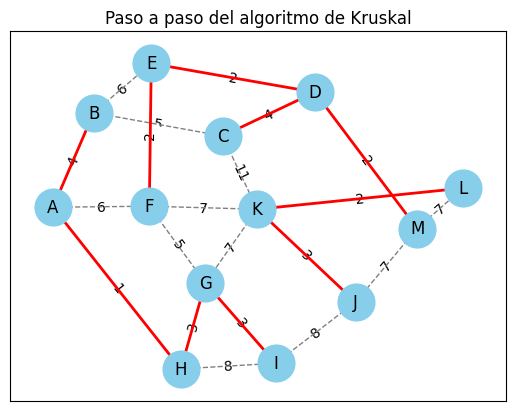

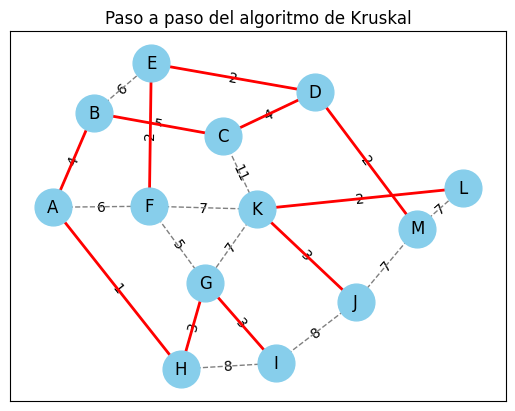

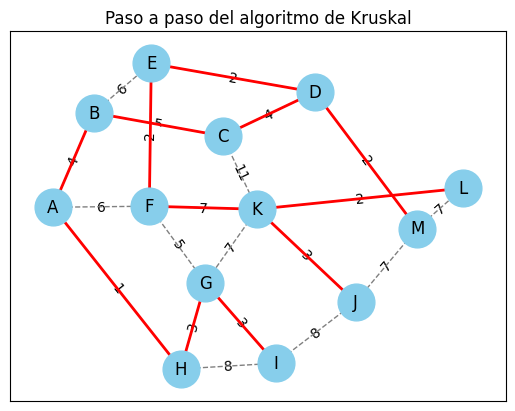

--------------------------------------------------------------


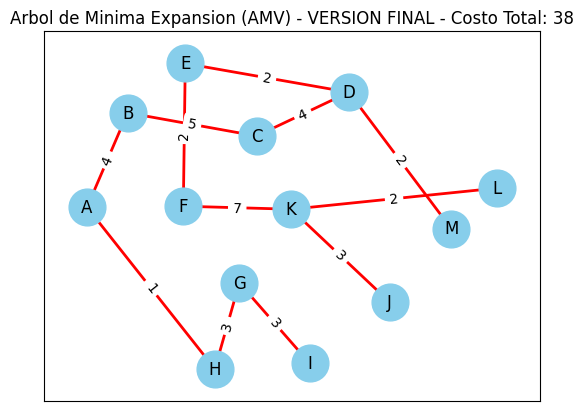

Costo total del Árbol de Mínima Expansión (AMV):  38


In [1]:
import networkx as nx
import matplotlib.pyplot as plt

def dibujar_grafo(grafo, posiciones, aristas_en_amv=None):
    
    # grafo inicial con todos los nodos y aristas
    nx.draw_networkx_nodes(grafo, posiciones, node_color='skyblue', node_size=700)
    nx.draw_networkx_labels(grafo, posiciones)
    nx.draw_networkx_edge_labels(grafo, posiciones, edge_labels=nx.get_edge_attributes(grafo, 'weight'))

    # genera las aristas con estilo punteado y color gris
    nx.draw_networkx_edges(grafo, posiciones, edge_color='gray', style='dashed')

    # resalta las aristas de color rojo aquellas que forman parte del AMV
    if aristas_en_amv:
        nx.draw_networkx_edges(grafo, posiciones, edgelist=aristas_en_amv, edge_color='red', width=2)

    plt.title("Paso a paso del algoritmo de Kruskal")
    plt.show()

def dibujar_grafo_final(grafo, posiciones, aristas_en_amv, costo_total):
    nx.draw_networkx_nodes(grafo, posiciones, node_color='skyblue', node_size=700)
    nx.draw_networkx_labels(grafo, posiciones)
    nx.draw_networkx_edges(grafo, posiciones, edgelist=aristas_en_amv, edge_color='red', width=2)
    nx.draw_networkx_edge_labels(grafo, posiciones, edge_labels={arista: grafo.edges[arista]['weight'] for arista in aristas_en_amv})

    plt.title(f"Arbol de Minima Expansion (AMV) - VERSION FINAL - Costo Total: {costo_total}")
    plt.show()

def algoritmo_kruskal(grafo):
    aristas_ordenadas = sorted(grafo.edges(data=True), key=lambda x: x[2]['weight'])
    amv = nx.Graph()
    aristas_en_amv = []
    costo_total = 0

    posiciones = nx.spring_layout(grafo)

    # se crea un AMV utilizando la estructura de union/busqueda
    padre = {nodo: nodo for nodo in grafo.nodes()}  # puntero padre para cada nodo
    rango = {nodo: 0 for nodo in grafo.nodes()}  # rango para el arbol de cada nodo

    def encontrar(nodo):
        if padre[nodo] != nodo:
            padre[nodo] = encontrar(padre[nodo])
        return padre[nodo]

    def unir(nodo1, nodo2):
        raiz1 = encontrar(nodo1)
        raiz2 = encontrar(nodo2)
        if raiz1 != raiz2:
            if rango[raiz1] > rango[raiz2]:
                padre[raiz2] = raiz1
            else:
                padre[raiz1] = raiz2
                if rango[raiz1] == rango[raiz2]:
                    rango[raiz2] += 1
            return True
        return False

    # añade las aristas al AMV siguiendo el algoritmo de Kruskal
    for arista in aristas_ordenadas:
        nodo1, nodo2, peso = arista
        if unir(nodo1, nodo2):
            amv.add_edge(nodo1, nodo2, weight=peso['weight'])
            aristas_en_amv.append((nodo1, nodo2))
            costo_total += peso['weight']
            dibujar_grafo(grafo, posiciones, aristas_en_amv)

    print("--------------------------------------------------------------")
    dibujar_grafo_final(amv, posiciones, aristas_en_amv, costo_total)
    return amv, costo_total

G = nx.Graph()
G.add_edges_from([
    ("A", "B", {'weight': 4}),
    ("A", "F", {'weight': 6}),
    ("A", "H", {'weight': 1}),
    ("B", "C", {'weight': 5}),
    ("B", "E", {'weight': 6}),
    ("C", "K", {'weight': 11}),
    ("C", "D", {'weight': 4}),
    ("D", "E", {'weight': 2}),
    ("D", "M", {'weight': 2}),
    ("E", "F", {'weight': 2}),
    ("F", "K", {'weight': 7}),
    ("F", "G", {'weight': 5}),
    ("G", "H", {'weight': 3}),
    ("G", "K", {'weight': 7}),
    ("G", "I", {'weight': 3}),
    ("H", "I", {'weight': 8}),
    ("I", "J", {'weight': 8}),
    ("J", "K", {'weight': 3}),
    ("J", "M", {'weight': 7}),
    ("K", "L", {'weight': 2}),
    ("M", "L", {'weight': 7})
])

amv_final, costo_total = algoritmo_kruskal(G)
print("Costo total del Árbol de Mínima Expansión (AMV): ", costo_total)